# Часть 1

### Пункт 1-2

В файле «donations.csv» находится выборка с информацией об участниках программы пожертвования денег на нужды ветеранских организаций. Каждая запись – один человек из списка рассылки. У него есть социо-демографические признаки (пол, возраст, медианная оценка дохода в районе его проживания, является ли он домовладельцем и т.д. и т.д.), поведенческие признаки (агрегированные характеристики его ранних пожертвований типа GiftCount36 – число пожертвований за три года, GiftAmntLast – сумма последнего пожертвования, PromCntCard12 – число контактов с ним за год в рамках рекламной компании и т.д.). Также есть два отклика: флаг TargetB (пожертвовал или нет) и TargetD – сумма пожертвования (пропуск, если не жертвовал, иначе сумма в долларах). В рамках первой части задания нужно построить регрессионные модели (только по людям, кто пожертвовал деньги), объясняющие и прогнозирующие сумму пожертвования TargetD. 

Выберите и сохраните в качестве проверочной выборки (holdout) 30% исходной выборки со стратификацией по отклику. Обратите внимание, что отклик непрерывный и его нужно дискретизировать. Число интервалов и метод дискретизации выберите самостоятельно. Постройте и визуализируйте гистограмму (или kde апроксимацию) для распределения отклика во всем исходном наборе, в проверочной и в тренировочной выборках. 

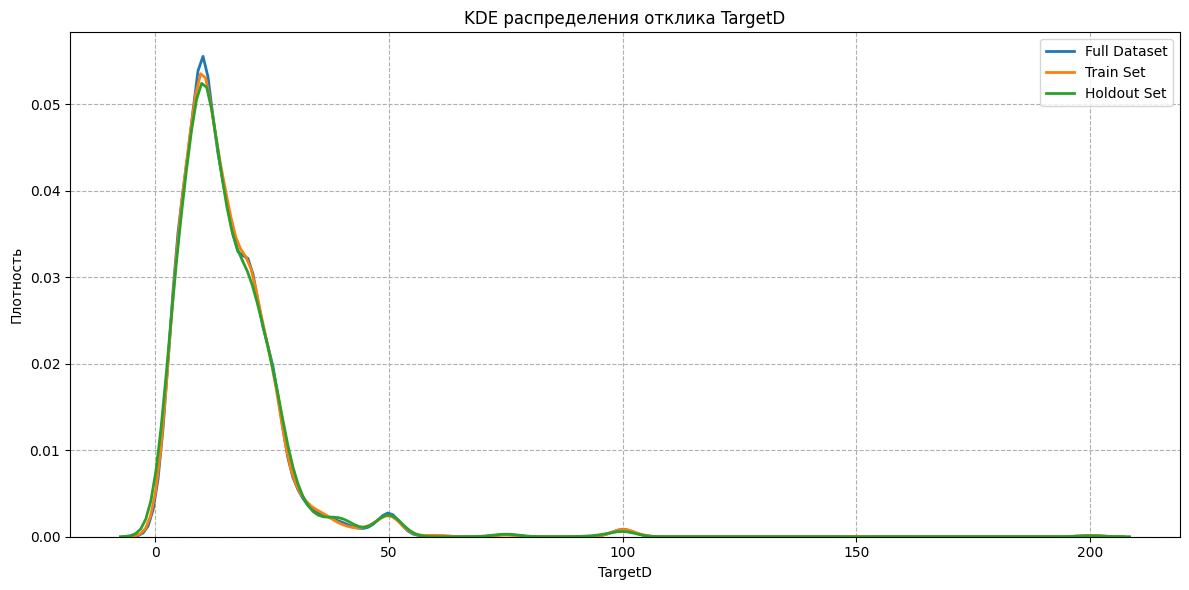

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("donations.csv")

df_valid = df.dropna(subset=["TargetD"]).copy()

df_valid["TargetD_bin"] = pd.qcut(df_valid["TargetD"], q=5, labels=False)

train_df, holdout_df = train_test_split(
    df_valid,
    test_size=0.3,
    stratify=df_valid["TargetD_bin"],
    random_state=42
)

plt.figure(figsize=(12, 6))
sns.kdeplot(df_valid["TargetD"], label="Full Dataset", linewidth=2)
sns.kdeplot(train_df["TargetD"], label="Train Set", linewidth=2)
sns.kdeplot(holdout_df["TargetD"], label="Holdout Set", linewidth=2)
plt.title("KDE распределения отклика TargetD")
plt.xlabel("TargetD")
plt.ylabel("Плотность")
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


### Пункт 3

На этапе предобработки данных сделайте подстановку пропусков методом `KnnImputer` с сохранением бинарных признаков о том, какие переменные были проимпутированы. Преобразования категориальных переменных с помощью `WOE`, `Target encoding`, `Threshold encoding` и других методов, а также преобразование числовых переменных (для получения более симметричных распределений с помощью log или Box-Cox) приветствуется, но не обязательно.

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)
df_numeric  

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemCluster,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0.0,14974.0,14.0,2.0,4.0,1.0,3.0,17.0,13.50,9.25,...,26.0,3.0,8.0,13.0,0.0,0.0,56.4,0.0,0.0,51844.6
1,0.0,6294.0,12.2,1.0,8.0,0.0,3.0,20.0,20.00,15.88,...,79.0,5.0,5.0,24.0,0.0,23.0,67.0,186800.0,85.0,58162.4
2,1.0,46110.0,4.0,6.0,41.0,3.0,20.0,6.0,5.17,3.73,...,51.0,5.0,11.0,22.0,1.0,0.0,72.8,87600.0,36.0,38750.0
3,1.0,185937.0,10.0,3.0,12.0,3.0,8.0,10.0,8.67,8.50,...,44.0,2.0,6.0,16.0,1.0,0.0,62.0,139200.0,27.0,38942.0
4,0.0,29637.0,10.6,1.0,1.0,1.0,1.0,20.0,20.00,20.00,...,13.0,4.0,7.0,6.0,0.0,35.0,53.0,168100.0,37.0,71509.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,1.0,2796.0,25.0,2.0,2.0,2.0,2.0,10.0,15.00,15.00,...,27.0,8.0,12.0,11.0,0.0,44.0,73.2,68200.0,38.0,45909.0
9682,0.0,184939.0,12.6,3.0,4.0,1.0,1.0,10.0,13.33,11.50,...,29.0,6.0,15.0,13.0,0.0,44.0,47.4,71900.0,35.0,50530.0
9683,1.0,184974.0,10.0,9.0,14.0,5.0,7.0,10.0,8.78,7.71,...,46.0,6.0,17.0,18.0,1.0,40.0,71.0,115700.0,32.0,58521.4
9684,0.0,184994.0,15.2,2.0,7.0,0.0,1.0,5.0,12.50,7.43,...,42.0,6.0,6.0,16.0,0.0,40.0,49.2,106300.0,32.0,62717.0
